In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/humans-to-have-visited-space/space_travellers.csv', index_col=['#'],
                parse_dates=['Date'])
df.head()

,Name,Nationality,Date,Flight
#,,,,
1,Yuri Gagarin,Soviet Union,1961-04-12,Vostok 1
2,Alan Shepard,United States,1961-05-05,Freedom 7
3,Virgil Grissom,United States,1961-07-21,Liberty Bell 7
4,Gherman Titov,Soviet Union,1961-08-06,Vostok 2
5,John Glenn,United States,1962-02-20,Friendship 7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 1 to 643
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         643 non-null    object        
 1   Nationality  643 non-null    object        
 2   Date         643 non-null    datetime64[ns]
 3   Flight       643 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.1+ KB


In [3]:
from collections import Counter
from plotly.express import bar
first_name_df = pd.DataFrame.from_dict(Counter([item[0] for item in df['Name'].str.split()]), orient='index',
                                      columns=['count']).reset_index().rename(columns={'index': 'first name'}) 
bar(data_frame=first_name_df[first_name_df['count'] > 1].sort_values(ascending=False, by='count'), x='first name', y='count')

Singletons are omitted here for clarity.

In [4]:
from plotly.express import histogram
histogram(x=df['Date'].dt.year, labels={'x': 'Year'})

In [5]:
from plotly.express import scatter
df['Year'] = df['Date'].dt.year
df['first name'] = df['Name'].str.split().apply(lambda x: x[0])
df['decade'] = df['Year']//10
scatter(data_frame=df, x='first name', y='Year')

In [6]:
scatter(data_frame=df, y='Year', x='Nationality', height=600)

In [7]:
from plotly.express import strip
strip(data_frame=df, x='Nationality', color='decade')

(-0.5, 1199.5, 1199.5, -0.5)

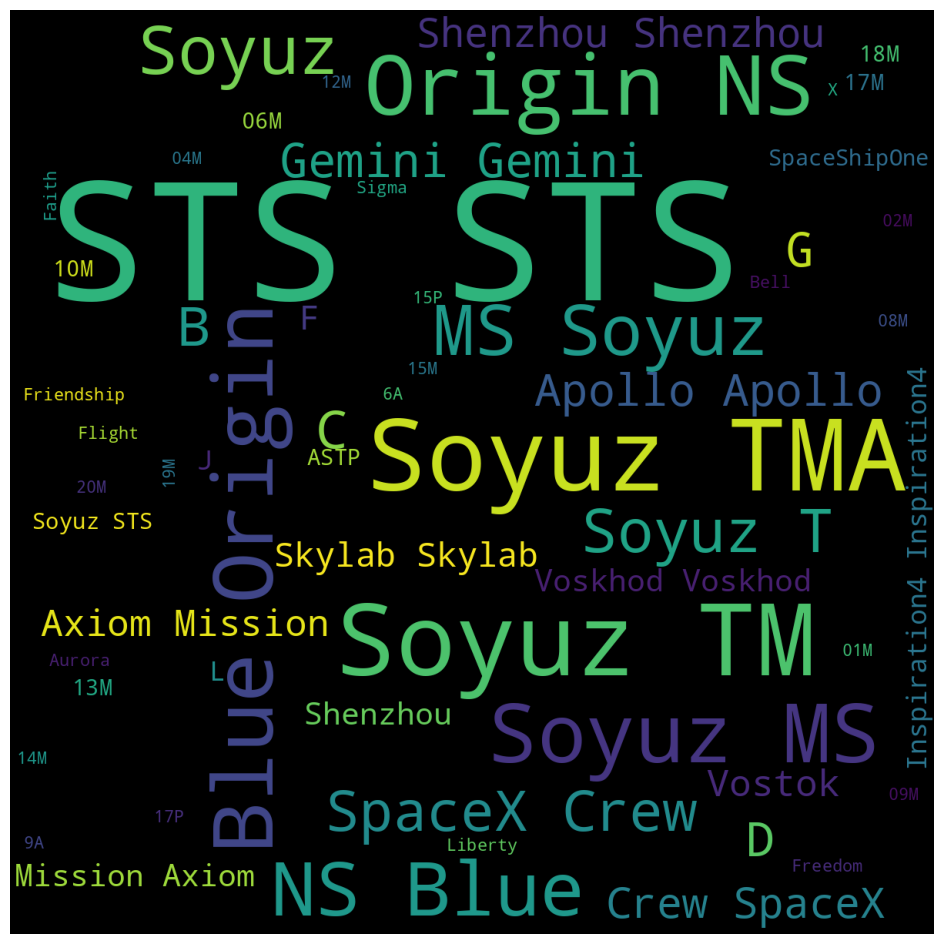

In [8]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Flight'].values), ))
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

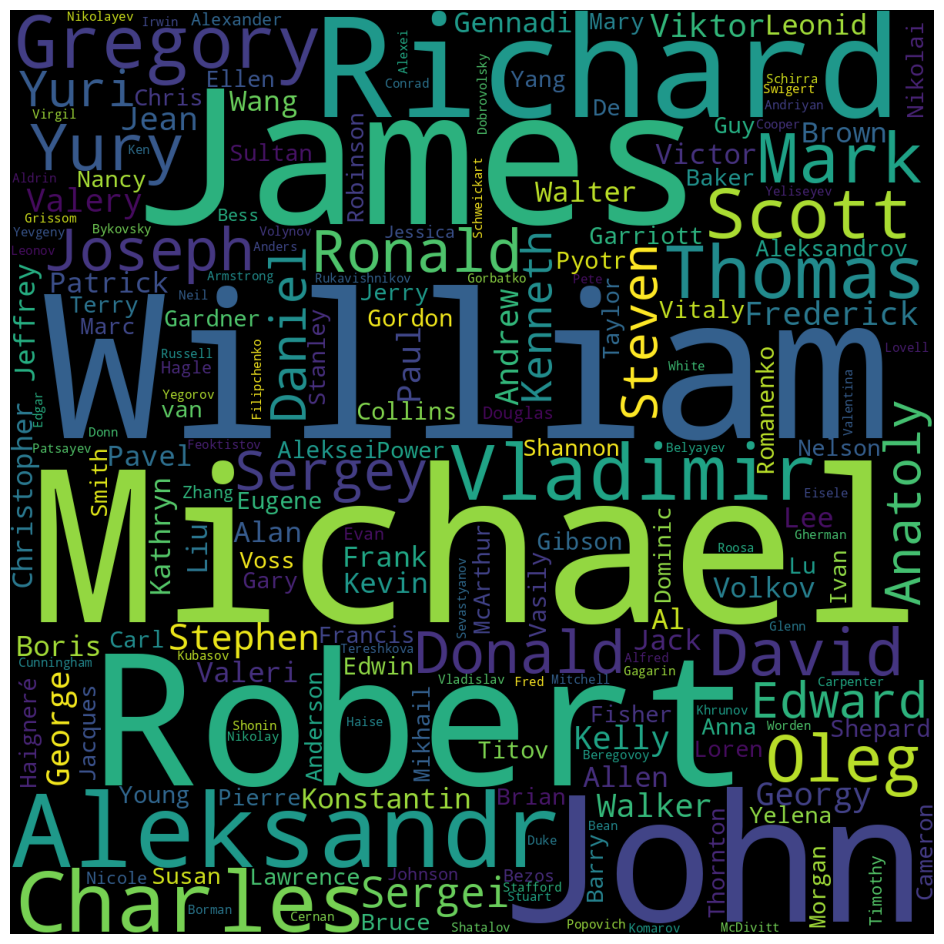

In [9]:
subplots(figsize=(12, 12))
imshow(X=WordCloud(random_state=2023, height=1200, width=1200 ).generate(text=' '.join(df['Name'].values), ))
axis('off')